------------

> ❗❗❗⚠️  💸   DONT USE GPU❗❗❗   
> **🧠 🤑   USE ONLY CPU (max GB used: RAM 4.5 - DISC 30 )**
------------

# Modelo de detección de Fraude utilizando ML

El ejercicio que se presenta a continuación corresponde al proyecto final correspondiente al bootcamp de inteligencia artificial y por medio de él, se pretende mostrar todos los conocimientos adquiridos durante este bootcamp. Para ello, el ejercicio que se plantea es el de desarrollar un modelo de ML que sea capaz de prevenir fraudes. Por ello, se va a utilizar el dataset existente de huggingface [CIS435-CreditCardFraudDetection](https://huggingface.co/datasets/dazzle-nu/CIS435-CreditCardFraudDetection) y se van a realizar los pasos necesarios para alcanzar el objetivo final. Estos son:

- En primer lugar, revisión del dataset y balanceo de los datos.
- En segundo lugar, análisis del dataset y limpieza del mismo (EDA).
- Medición de performace entre diferentes modelos de ML
- Optimización de Hiperparámetros para el modelo elegido
- Despliegue del modelo final en la nube.

El notebook está dividio en subapartados para organizar de una forma más clara todo el ejercicio. Además, en cada celda se explica que es lo que se pretende conseguir y se justifica todas las decisiones tomadas.

# 1. Carga del dataset y balanceo del mismo

In [ ]:
# Instalamos las librerías necesarias
!pip install --upgrade -q google-api-python-client google-auth-httplib2 google-auth-oauthlib

Importamos las librerías necesarias para el proyecto e importamos el dataset de huggingface [CIS435-CreditCardFraudDetection](https://huggingface.co/datasets/dazzle-nu/CIS435-CreditCardFraudDetection).

In [ ]:
# Agregamos todos las librerias base con las que vamos a trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import google.auth
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from google.colab import auth
%matplotlib inline

In [ ]:
# Obtenemos el dataset
df = pd.read_csv("hf://datasets/dazzle-nu/CIS435-CreditCardFraudDetection/fraudTrain.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


Mostramos los primeros cinco resgistros para poder visualizar el contenido de los mismos.

In [ ]:
df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
trans_date_trans_time,1/1/19 0:00,1/1/19 0:00,1/1/19 0:00,1/1/19 0:01,1/1/19 0:03
cc_num,2703190000000000.0,630423000000.0,38859500000000.0,3534090000000000.0,375534000000000.0
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.97,107.23,220.11,45.0,41.96
first,Jennifer,Stephanie,Edward,Jeremy,Tyler
last,Banks,Gill,Sanchez,White,Garcia
gender,F,F,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest


In [ ]:
# Obtenemos la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

Como puede apreciarse, las últimas dos columnas poseen registros nulos que no tiene sentido mantenerlos en el dataset. Por ello, las eliminamos.

In [ ]:
# Eliminamos las columnas con todos nulos
df = df.drop(['Unnamed: 23', '6006'], axis=1)

Seguidamente comprobamos la proporción de los datos entre las transacciones fraudolentas y las no fraudolentas.

In [ ]:
# Contamos la cantidad de registros fraudulentos y no fraudulentos
fraud_counts = df['is_fraud'].value_counts().reset_index()
fraud_counts.columns = ['is_fraud', 'count']

# Convertimos los valores de 'is_fraud' a etiquetas más comprensibles
fraud_counts['is_fraud'] = fraud_counts['is_fraud'].replace({0: 'No Fraude', 1: 'Fraude'})

# Calculamos los porcentajes
total_records = df.shape[0]
fraud_counts['percentage'] = (fraud_counts['count'] / total_records) * 100
print(fraud_counts)

    is_fraud    count  percentage
0  No Fraude  1042569   99.427223
1     Fraude     6006    0.572777


Como puede apreciarse, el dataset está muy desbalanceado ya que el 99.5 corresponde a transacciones que no han sufrido fraude mientras que solamente el 0.5 corresponde transacciones que han sufrido fraude. El hecho de trabajar con un dataset tan desbalanceado es peligroso porque puede provocar que el modelo tienda a sesgarse hacia la clase dominante (en este caso el no fraude) y por lo tanto el modelo no sea capaz de identificar correctamente las transacciones de tipo fraude. Por ello, con el fin de ajustar esta desproporción, vamos a balancear el dataset.

Para balancear el dataset, podemos utilizar distintas técnicas vistas durante el bootcamp como puede ser la técnica de oversampling o undersampling. Si se aplicará la técnica de oversampling, se tendrían que generar 1036563 transacciones fraudolentas para conseguir una distribución equitativa en el dataset. Sin embargo, el coste de hacer esto puede ser elevado ya que puede ser complicado conseguir tantas transacciones fraudolentas. Es por eso que esta idea la descartamos ya que consideramos que el coste que supondría conseguirlas no sería valioso.

Por otro lado, aplicar la técnica de undersampling podría ser interesante pero tendría el gran inconveniente de que tendríamos como resultado un dataset con 12012 registros, lo cual supondría reducir el dataset en casi un 98%. Creemos que está reducción es muy drástica y dado que se poseen suficientes datos, pensamos que es mejor utilizar una proporción distinta con el fin de obtener un modelo mucho más robusto que generalice mejor. Por ello, tras haberlo discutido internamenete en el equipo, creemos que una buena proporción para el dataset es de 1 a 7, es decir, para cada transacción fraudolenta tener siete no fraudolentas. Gracias a esta proporción se consiguen un buen número de muestras (casi 50000) pero además se consigue que el modelo se sesgue menos hacia la clase dominante ya que la proporción es menor. Es por eso que seguidamente procedemos a implementarlo.




In [ ]:
# armamos el filtro para fraude
filter_is_fraud = df['is_fraud'] == 1

In [ ]:
# creamos un dataframe con solo los registros para Fraude
df_is_fraud = df[filter_is_fraud]
df_is_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2449 to 1047918
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6006 non-null   int64  
 1   trans_date_trans_time  6006 non-null   object 
 2   cc_num                 6006 non-null   float64
 3   merchant               6006 non-null   object 
 4   category               6006 non-null   object 
 5   amt                    6006 non-null   float64
 6   first                  6006 non-null   object 
 7   last                   6006 non-null   object 
 8   gender                 6006 non-null   object 
 9   street                 6006 non-null   object 
 10  city                   6006 non-null   object 
 11  state                  6006 non-null   object 
 12  zip                    6006 non-null   int64  
 13  lat                    6006 non-null   float64
 14  long                   6006 non-null   float64
 15  cit

In [ ]:
# creamos un dataset con registros validos (NO SON FRAUDE)
df_valid = df[~filter_is_fraud]  #utilizamos el filtro NEGADO para que obtenga los valores opuestos
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042569 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1042569 non-null  int64  
 1   trans_date_trans_time  1042569 non-null  object 
 2   cc_num                 1042569 non-null  float64
 3   merchant               1042569 non-null  object 
 4   category               1042569 non-null  object 
 5   amt                    1042569 non-null  float64
 6   first                  1042569 non-null  object 
 7   last                   1042569 non-null  object 
 8   gender                 1042569 non-null  object 
 9   street                 1042569 non-null  object 
 10  city                   1042569 non-null  object 
 11  state                  1042569 non-null  object 
 12  zip                    1042569 non-null  int64  
 13  lat                    1042569 non-null  float64
 14  long                   

In [ ]:
# Revisamos la cantidad de filas y columnas de ambos datasets
df_is_fraud.shape,  df_valid.shape

((6006, 23), (1042569, 23))

In [ ]:
# armamos un dataset con un valor proporcional de df_is_fraud vs df_valid. En este caso propoción 1:7
multiplier = 7
num_rows = df_is_fraud.shape[0] * multiplier
df_valid_reduced = df_valid.iloc[0:num_rows]
df_valid_reduced.shape

(42042, 23)

In [ ]:
# armamos el dataset general para trabajo. concatenamos el dataframe reducido a una proporción de df_is_fraud y este
df_reduced = pd.concat([df_valid_reduced, df_is_fraud])
df_reduced.shape

(48048, 23)

Comprobamos que los cambios se han introducido correctamente.

In [ ]:
# Contamos la cantidad de registros fraudulentos y no fraudulentos
fraud_counts = df_reduced['is_fraud'].value_counts().reset_index()
fraud_counts.columns = ['is_fraud', 'count']

# Convertimos los valores de 'is_fraud' a etiquetas más comprensibles
fraud_counts['is_fraud'] = fraud_counts['is_fraud'].replace({0: 'No Fraude', 1: 'Fraude'})

# Calculamos los porcentajes
total_records = df_reduced.shape[0]
fraud_counts['percentage'] = (fraud_counts['count'] / total_records) * 100
print(fraud_counts)

    is_fraud  count  percentage
0  No Fraude  42042        87.5
1     Fraude   6006        12.5


Podemos apreciar como los cambios se han implementado correctamente y que ahora el dataset está más balanceado. A partir de ahora vamos a trabajar con este nuevo dataset balanceado y para evitar la contaminación de los datos, procedemos a dividirlo entre train y test y guardamos los nuevos datasets en ficheros CSV.

In [ ]:
df_train, df_test = train_test_split(df_reduced, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {df_train.shape}')
print(f'Dimensiones del dataset de test: {df_test.shape}')

Dimensiones del dataset de training: (38438, 23)
Dimensiones del dataset de test: (9610, 23)


In [ ]:
# Autenticamos el usuario en Google Colab
auth.authenticate_user()

In [ ]:
# Obtener credenciales del entorno
creds, _ = google.auth.default()

# Crear el servicio de Google Drive
drive_service = build('drive', 'v3', credentials=creds)

In [ ]:
# Guardar los datasets localmente primero
fraude_train_filename = 'fraude_train.csv'
fraude_test_filename = 'fraude_test.csv'

df_train.to_csv('fraude_train.csv', sep=';', decimal='.', index=False)
df_test.to_csv('fraude_test.csv', sep=';', decimal='.', index=False)

# Especificar el ID de la carpeta en Google Drive donde se guardarán los archivos
folder_id = '1Ihit8ngHtsKlykuF51xXFWMa8k7oYw_D'

In [ ]:
# Función para subir un archivo a Google Drive
def upload_to_drive(file_path, folder_id):
    file_metadata = {
        'name': os.path.basename(file_path),  # Nombre del archivo en Google Drive
        'parents': [folder_id]  # ID de la carpeta donde se guardará el archivo
    }
    media = MediaFileUpload(file_path, resumable=True)
    uploaded_file = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()
    return uploaded_file.get('id')

In [ ]:
# Subimos los archivos de los datasets
fraude_train_file_id = upload_to_drive(fraude_train_filename, folder_id)
fraude_test_file_id = upload_to_drive(fraude_test_filename, folder_id)

In [ ]:
# Confirmación
print(f"Fraude Train dataset guardado en: https://drive.google.com/file/d/{fraude_train_file_id}")
print(f"Fraude Test dataset guardado en: https://drive.google.com/file/d/{fraude_test_file_id}")

Fraude Train dataset guardado en: https://drive.google.com/file/d/1lDLt_kR9djTmmDvA6w7Ll6NPkxcdPKuM
Fraude Test dataset guardado en: https://drive.google.com/file/d/1OQo7HSv_Rf_4GhViSAJiLj263A_9OwiY


# 2. Análisis exploratorio

## Análisis de columnas de texto libre

A partir de ahora unicamente vamos a trabajar con los datos de train. Por ello, importamos el fichero y mostramos la proporción de los datos entre los que son fraude y los que no son.

In [ ]:
# Contamos la cantidad de registros fraudulentos y no fraudulentos
fraud_counts = df_train['is_fraud'].value_counts().reset_index()
fraud_counts.columns = ['is_fraud', 'count']

# Convertimos los valores de 'is_fraud' a etiquetas más comprensibles
fraud_counts['is_fraud'] = fraud_counts['is_fraud'].replace({0: 'No Fraude', 1: 'Fraude'})

# Calculamos los porcentajes
total_records = df_train.shape[0]
fraud_counts['percentage'] = (fraud_counts['count'] / total_records) * 100
print(fraud_counts)

    is_fraud  count  percentage
0  No Fraude  33645   87.530569
1     Fraude   4793   12.469431


Como puede observarse, el dataset de train sigue estando proporcionado 1:7.

Seguidamente, generamos un diccionario para conocer el contenido de cada campo. Este diccionario indica el número de no nulos, el tipo de datos y una breve descripción sobre cada campo.



| # | Nombre | No Nulos | Tipo Dato | Descripción |
| --- | ---------------- | ------------ | ------------ | ------------ |
| | | | | |
| 0  | Unnamed: 0            | 1048575 non-null | int64   | Es un indice numérico |   
| 1  | trans_date_trans_time | 1048575 non-null | object  | Es un texto que representa la fecha y hora de transacción|  
| 2  | cc_num                | 1048575 non-null | float64 | Número de Tarjeta de Crédito |  
| 3  | merchant              | 1048575 non-null | object  | Nombre del Comercio |  
| 4  | category              | 1048575 non-null | object  | Rubro del comercio |  
| 5  | amt                   | 1048575 non-null | float64 | Monto de la compra |  
| 6  | first                 | 1048575 non-null | object  | Nombre del Cliente |  
| 7  | last                  | 1048575 non-null | object  | Apellido del Cliente |  
| 8  | gender                | 1048575 non-null | object  | Letra del Genero del cliente |  
| 9  | street                | 1048575 non-null | object  | Dirección del cliente |  
| 10 | city                  | 1048575 non-null | object  | Cuidad del Cliente |  
| 11 | state                 | 1048575 non-null | object  | Estado del cliente |  
| 12 | zip                   | 1048575 non-null | int64   | Codigo Postal del cliente |  
| 13 | lat                   | 1048575 non-null | float64 | Latitud de la ubicación del cliente |  
| 14 | long                  | 1048575 non-null | float64 | Longitud de la ubicación del cliente |  
| 15 | city_pop              | 1048575 non-null | int64   | Población de la cuidad del cliente         |  
| 16 | job                   | 1048575 non-null | object  | Trabajo del cliente |  
| 17 | dob                   | 1048575 non-null | object  | Fecha de Nacimiento del cliente |  
| 18 | trans_num             | 1048575 non-null | object  | Número de la transacción (un texto en hexadecimal) |  
| 19 | unix_time             | 1048575 non-null | int64   | Fecha y hora de la transacción en tiempo UNIX |  
| 20 | merch_lat             | 1048575 non-null | float64 | Latitud de la ubicación del comercio |  
| 21 | merch_long            | 1048575 non-null | float64 | Longitud de la ubicación del comercio |  
| 22 | is_fraud              | 1048575 non-null | int64   |  Usa el 1 para FRAUDE y 0 cuando no lo es |  
| 23 | Unnamed: 23           | 0 non-null       | float64 | Imposible identificar que representa ya que no contiene datos |  
| 24 | 6006                  | 0 non-null       | float64 | Imposible identificar que representa ya que no contiene datos |  



Nos centramos primeramente en trabajar con los campos que son de tipo object.

In [ ]:
# Obtenemos la info de los campos "object"
df_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 38438 entries, 39748 to 2737
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   trans_date_trans_time  38438 non-null  object
 1   merchant               38438 non-null  object
 2   category               38438 non-null  object
 3   first                  38438 non-null  object
 4   last                   38438 non-null  object
 5   gender                 38438 non-null  object
 6   street                 38438 non-null  object
 7   city                   38438 non-null  object
 8   state                  38438 non-null  object
 9   job                    38438 non-null  object
 10  dob                    38438 non-null  object
 11  trans_num              38438 non-null  object
dtypes: object(12)
memory usage: 3.8+ MB


In [ ]:
# Mostramos la cabecera traspuesta de solo los campos tipo "object"
df_train.select_dtypes(include=['object']).head(5).T

,39748,5412,19160,19682,41904
trans_date_trans_time,1/24/19 6:25,1/4/19 13:10,1/12/19 16:27,1/12/19 23:31,1/25/19 21:59
merchant,fraud_Vandervort-Funk,"fraud_Zemlak, Tillman and Cremin",fraud_Romaguera and Sons,fraud_Kilback LLC,fraud_Hamill-D'Amore
category,grocery_pos,personal_care,travel,food_dining,health_fitness
first,Christopher,Robert,Adam,Rachel,Teresa
last,Horn,Evans,Kirk,Lowe,Clark
gender,M,M,M,F,F
street,956 Sanchez Highway,01892 Patricia Vista Apt. 828,40847 Stark Junctions,372 Jeffrey Course,1323 Derek Mission
city,Mallie,Sachse,Big Indian,Sutherland,Noonan
state,KY,TX,NY,NE,ND
job,Facilities manager,Site engineer,Psychiatrist,Insurance broker,Industrial/product designer


En total tenemos 12 campos de tipo object, de los cuales algunos pueden ser eliminados dado que lo único que pueden generar son ruido para el modelo. El análisis sobre cada uno de los campos se expone seguidamente:

* trans_date_trans_time: Este campo proporciona la fecha y hora en la que se produjo la transacción. Es importante mantenerlo ya que generalmente cuando se produce un fraude suele existir algún patrón en los días previos al fraude.

* merchant: Campo que indica el comercio en donde se ha producido la transacción. También es importante mantenerlo ya que a veces cuando se realizan fraudes pueden ser debidos a que un comercio ha sido expuesto, y como consencuencia, clientes que han operado con dicho cliente sufren fraudes.

* category: Campo que indica a que se dedica el comercio indicado en el campo merchant. En sí se podría eliminar ya que no aporta información al modelo, sin embargo, no se va a eliminar de momento para poder generar métricas que muestren los fraudes debido a las categorías.

* fist, last, gender: Son tres campos referentes al cliente que ha realizado la transacción. No aportan información al modelo por lo que se pueden eliminar.

* street, city, state: Son campos referentes a la ubicación del cliente que ha realizado la transacción. Creemos que también estos campos pueden ser eliminados por el hecho de que se poseen dos campos (latitud y altitud) que indican la misma información que estos campos. Por lo tanto, no merece la pena almacenar la misma información entre varias columnas, por lo que se eliminan.

* job: Indica la profesión del cliente y en principio no parezca que exista relación entre el fraude y el trabajo. Por ello, se analizará con detalle este campo para poder eliminarlo.

* dob: fecha de nacimiento del cliente. Tampoco parece que exista una relación directa entre la fecha del cliente y los fraudes, por lo que se analizará en profundidad para confirmar que se puede eliminar.

* trans_num: Número en hexadecimal de la transacción. Es un identificador de cada transacción que en el mundo real es muy importante ya que es el código que identifica cada transacción. Sin emabrgo, para entrenar el modelo, no es necesario mantenerlo porque no tiene relación con el fraude por lo que se elimina.

Posibles columnas a eliminar en base al análisis previamente explicado:
- first
- last
- gender
- street
- city
- state
- trans_num

Analizamos con detalle las columnas job y dob. Para ello vamos a comprobar si existe una relación entre estos campos y el campo fraude.

In [ ]:
# Filtramos los registros donde is_fraud es igual a 1
fraud_data = df_train[df_train['is_fraud'] == 1]

# Agrupamos por la columna 'job' y contamos la cantidad de fraudes por profesión
fraud_by_job = fraud_data['job'].value_counts().reset_index()
fraud_by_job.columns = ['job', 'fraud_count']

# Agrupamos por la columna 'dob' y contamos la cantidad de fraudes por fecha de nacimiento
fraud_by_dob = fraud_data['dob'].value_counts().reset_index()
fraud_by_dob.columns = ['dob', 'fraud_count']

# Mostramos las tablas
print("Fraudes por Profesión:")
print(fraud_by_job)

print("\nFraudes por Fecha de Nacimiento:")
print(fraud_by_dob)


Fraudes por Profesión:
                                      job  fraud_count
0                      Materials engineer           41
1                     Exhibition designer           40
2                Surveyor, land/geomatics           38
3                                 Curator           34
4                   Private music teacher           34
..                                    ...          ...
391                           Optometrist            2
392                            Contractor            2
393                Pension scheme manager            2
394                          Statistician            2
395  English as a second language teacher            1

[396 rows x 2 columns]

Fraudes por Fecha de Nacimiento:
          dob  fraud_count
0     3/15/38           18
1      1/6/42           17
2      4/4/96           16
3     6/22/01           16
4      7/5/01           16
..        ...          ...
599  10/22/91            2
600   6/26/55            2
601    7/8/85   

En principio, no existe una relación directa entre los fraudes y la profesión y la fecha de nacimiento ya que por ejemplo para el caso de la profesión, 396 colectivos han sufrido fraude y el que más ha sido damnificado han sido los ingenieros de materiales, que supone un 10% del total. Esto lo que hace indicar es que hay mucha variedad de profesiones que han sufrido fraude y por lo tanto no existe una relación entre la profesión y el fraude.

Por su parte, lo mismo ocurre con las fechas de nacimiento, en este caso hay 604 fechas distintas de nacimiento y la que más se repite ocurre 18 veces (un 3% del total). Por lo tanto, también existe una gran variedad de fechas de nacimiento que han sufrido fraude y por lo tanto no existe una relación directa entre el fraude y las fechas de nacimiennto.

Posibles columnas a eliminar en base al análisis previamente explicado:
- job
- dob

## Revisión de columnas numéricas

In [ ]:
# Obtenemos la info de los campos que NO son "object"
df_train.select_dtypes(exclude=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 38438 entries, 39748 to 2737
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  38438 non-null  int64  
 1   cc_num      38438 non-null  float64
 2   amt         38438 non-null  float64
 3   zip         38438 non-null  int64  
 4   lat         38438 non-null  float64
 5   long        38438 non-null  float64
 6   city_pop    38438 non-null  int64  
 7   unix_time   38438 non-null  int64  
 8   merch_lat   38438 non-null  float64
 9   merch_long  38438 non-null  float64
 10  is_fraud    38438 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 3.5 MB


In [ ]:
# Mostramos la cabecera traspuesta de los campos que NO son de tipo "object"
df_train.select_dtypes(exclude=['object']).head(5)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
39748,39748,3.607810e+13,126.10,41836,37.2692,-82.9161,798,1327386350,37.429749,-82.828426,0
5412,5412,4.755700e+12,4.57,75048,32.9643,-96.6012,20328,1325682657,33.062253,-97.423714,0
19160,19160,2.131260e+14,2.41,12410,42.0740,-74.4530,397,1326385629,43.053188,-74.149802,0
19682,19682,3.764450e+14,47.33,69165,41.1558,-101.1360,1789,1326411078,42.155397,-101.537459,0
41904,41904,3.858050e+13,45.80,58765,48.8856,-103.0098,248,1327528776,49.460141,-102.638408,0


Al mostrar los campos que no son de tipo object aparece en formato notación científica el campo cc_num. Formateamos este campo a tipo numérico.

In [ ]:
# Convertimos cc_num a tipo int para eliminar la notación científica
df_train['cc_num'] = df_train['cc_num'].astype(int)

# Mostramos la cabecera traspuesta de los campos que NO son de tipo "object"
df_train.select_dtypes(exclude=['object']).head(5)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
39748,39748,36078100000000,126.10,41836,37.2692,-82.9161,798,1327386350,37.429749,-82.828426,0
5412,5412,4755700000000,4.57,75048,32.9643,-96.6012,20328,1325682657,33.062253,-97.423714,0
19160,19160,213126000000000,2.41,12410,42.0740,-74.4530,397,1326385629,43.053188,-74.149802,0
19682,19682,376445000000000,47.33,69165,41.1558,-101.1360,1789,1326411078,42.155397,-101.537459,0
41904,41904,38580500000000,45.80,58765,48.8856,-103.0098,248,1327528776,49.460141,-102.638408,0


Los campos que no son de tipo object son campos que aportan distinta información. Algunos de ellos pueden ser eliminados pero otros no, por ello se presenta a continuación el análisis realizado sobre estos campos.

* Unnamed 0: Es un índico numérico que identifica la transacción. No merece la pena mantenerlo en el dataset por lo que se puede eliminar.

* cc_num: Número de la tarjeta de crédito. A priori se podría eliminar pero es cierto que puede ser que exista alguna relación entre tarjetas de crédito utilizadas y fraude por lo que no se elimina por si acaso.

* amt: Es la cantidad realizada en la transacción. Puede ser interesante mantenerala porque cuando se realiza un fraude generalmente se suelen realizar compras menores con esa tarjeta antes de que se produzca el fraude. Por eso, lo mantenemos.

* zip: Código postal del cliente. No aporta información ya que se posee la latitud y altitud de cada cliente por lo que puede ser eliminado.

* lat, long: Son los campos que indican la latitud y longitud del cliente por lo que los mantenemos ya que la ubicación a la hora de identificar fraudes es importante.

* city_pop: Es un número que identifica la ciudad del cliente. Por el mismo modo que se ha elimiando el código postal, eliminamos este identificador.

* unix_time: Fecha y hora de la transacción en formato UNIX. No se puede eliminar este campo porque es importante conocer cuando se produce el fraude.

* merch_lat, merch_long: lo mismo que ocurre con la latitud y longitud del cliente, no se puede eliminar la ubicación del establecimiento en donde se ha producido la transacción. Por ello no se elimina.

* is_fraud: no se puede eliminar porque es el campo que identifica si son fraude o no.

Posibles columnas a eliminar en base al análisis previamente explicado:
- Unnamed: 0
- zip
- city_pop

## Codificación de variables



El dataset posee 11 columnas, pero la primera y la octava parece que indican la misma información. Una lo ofrece en formato legible y otra en formato UNIX. Vamos a comprobarlo para cerciorarnos de que esto es cierto.

In [ ]:
# Seleccionamos cinco registros aleatorios
sample_rows = df_train.sample(5)

# Transformamos el formato unix_time a formato legible de fecha y hora
sample_rows['unix_time_readable'] = pd.to_datetime(sample_rows['unix_time'], unit='s')

# Mostramos las columnas trans_date_trans_time y unix_time_readable de estos registros
sample_comparison = sample_rows[['trans_date_trans_time', 'unix_time_readable']]

# Mostramos la comparación
print(sample_comparison)


      trans_date_trans_time  unix_time_readable
34244          1/21/19 7:39 2012-01-21 07:39:06
88565         2/21/19 23:34 2012-02-21 23:34:07
27470         1/16/19 20:11 2012-01-16 20:11:37
28687         1/17/19 20:24 2012-01-17 20:24:07
16185         1/10/19 14:22 2012-01-10 14:22:30


Puede apreciarse que los datos concuerdan pero existe una discrepancia de 7 años entre ambas fechas. Esto es curioso ya que en principio debería ser la misma. Una posible causa de que esta discrepancia es que el campo trans_date_trans_time se haya generado de forma incorrecta con respecto a los años. En principio, parece lógico que el error se deba al campo de tipo texto que a un campo numérico. Es por eso que vamos a dar como válido el campo UNIX y vamos a eliminar el campo trans_date_trans_time. Asimismo, para que sea más sencillo para el modelo, no vamos a formatear el campo UNIX.

Por otro lado, existen dos columnas (merchant y category) que son columnas de tipo texto. Es por eso que es importante codificarlas para que el modelo pueda entenderlas. Sin embargo, antes de codificarlas, realizamos un análisis para conocer la distribución entre los fraudes y los comercios.


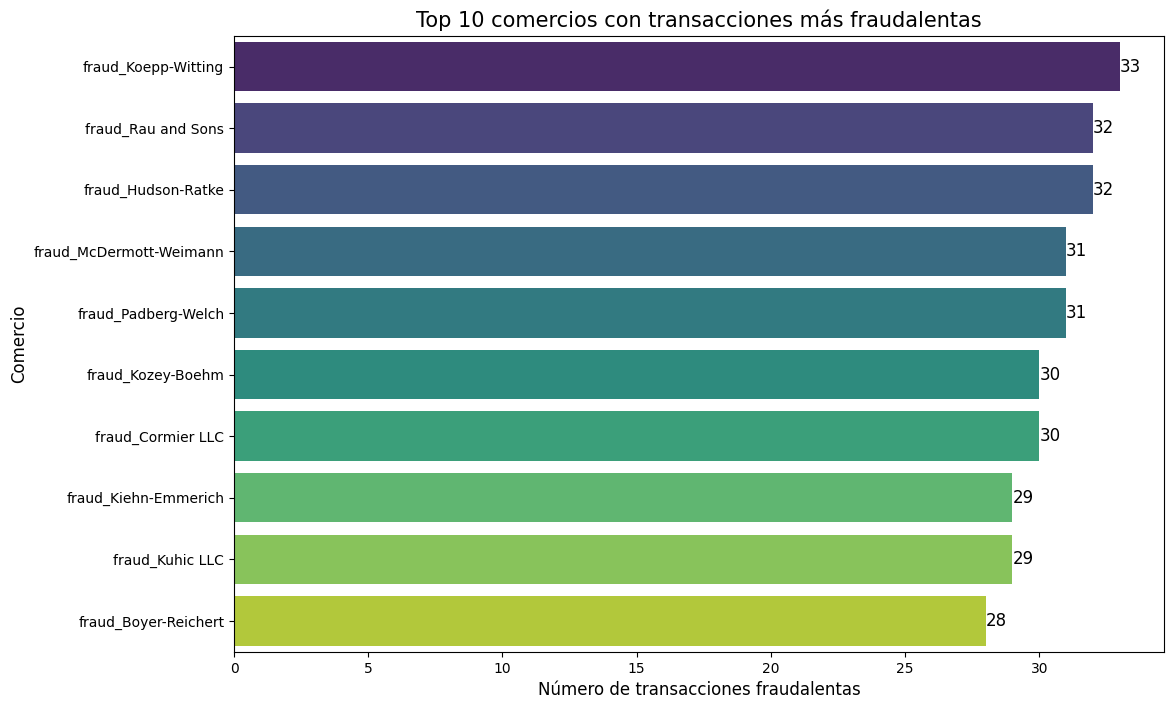

In [ ]:
# Filtrar solo las transacciones que son fraudes
fraud_transactions = df_train[df_train['is_fraud'] == 1]

# Contar la frecuencia de cada comercio para transacciones fraudulentas
fraud_merchant_counts = fraud_transactions['merchant'].value_counts()

# Seleccionar los 10 comercios con más fraudes para mostrar en el gráfico
top_fraud_merchants = fraud_merchant_counts.head(10)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontal
ax = sns.barplot(x=top_fraud_merchants.values, y=top_fraud_merchants.index, palette='viridis', hue=top_fraud_merchants.index, legend=False)

# Configurar título y etiquetas de los ejes
plt.title('Top 10 comercios con transacciones más fraudalentas', fontsize=15)
plt.xlabel('Número de transacciones fraudalentas', fontsize=12)
plt.ylabel('Comercio', fontsize=12)

# Mostrar el número total de fraudes en cada barra
for i, count in enumerate(top_fraud_merchants.values):
    ax.text(count, i, f'{count}', va='center', fontsize=12)

# Mostrar el gráfico
plt.show()



In [ ]:
top_fraud_merchants

merchant
fraud_Koepp-Witting        33
fraud_Rau and Sons         32
fraud_Hudson-Ratke         32
fraud_McDermott-Weimann    31
fraud_Padberg-Welch        31
fraud_Kozey-Boehm          30
fraud_Cormier LLC          30
fraud_Kiehn-Emmerich       29
fraud_Kuhic LLC            29
fraud_Boyer-Reichert       28
Name: count, dtype: int64

Conocidos cuales son los comercios que más fraudes han sufrido, es interesante también conocer la distribución de las transacciones en base a los comercios. Esto lo comentamos porque puede ser que el comercio dominante sea el comercio fraud_koepp_witting y que por eso sea el que más fraudes ha sufrido. Por ello, calculamos la distribución de transacciones en base a los comercios.

In [ ]:
# Calculamos la proporción de cada categoría en porcentaje
merchant_distribution = df_train['merchant'].value_counts(normalize=True) * 100

# Creamos una tabla con las proporciones
merchant_distribution_table = merchant_distribution.reset_index()
merchant_distribution_table.columns = ['merchant', 'percentage']

print(merchant_distribution_table)

                                  merchant  percentage
0                        fraud_Cormier LLC    0.369426
1                          fraud_Boyer PLC    0.330402
2                        fraud_Kilback LLC    0.327801
3                  fraud_McDermott-Weimann    0.304386
4                           fraud_Kuhn LLC    0.299183
..                                     ...         ...
688                    fraud_Kessler Group    0.044227
689  fraud_Hodkiewicz, Prohaska and Paucek    0.041625
690                    fraud_Smitham-Boehm    0.039024
691                    fraud_Hackett Group    0.039024
692                fraud_Reichert-Weissnat    0.031219

[693 rows x 2 columns]


En la tabla de distribuciones que hemos generado no se aprecia facilmente cual es la proporción de los top 10 comercios que han sufrido fraude. Por ello, generamos una nueva tabla pero solo para los top 10 comercios que han sufrido fraude.

In [ ]:
# Lista de top 10 comercios que han sufrido fraude
specific_merchants = [
    'fraud_Koepp-Witting',
    'fraud_Rau and Sons',
    'fraud_Hudson-Ratke',
    'fraud_McDermott-Weimann',
    'fraud_Padberg-Welch',
    'fraud_Kozey-Boehm',
    'fraud_Cormier LLC',
    'fraud_Kiehn-Emmerich',
    'fraud_Kuhic LLC',
    'fraud_Boyer-Reichert']

# Calculamos el total de filas en el DataFrame original
total_count = len(df_train)

# Filtramos el DataFrame para obtener solo las filas con las categorías específicas
filtered_df = df_train[df_train['merchant'].isin(specific_merchants)]

# Calculamos la proporción de cada categoría específica en porcentaje respecto al total del DataFrame original
merchant_counts = filtered_df['merchant'].value_counts()
merchant_distribution = merchant_counts / total_count * 100

# Creamos una tabla con las proporciones
merchant_distribution_table = merchant_distribution.reset_index()
merchant_distribution_table.columns = ['merchant', 'percentage']

print(merchant_distribution_table)


                  merchant  percentage
0        fraud_Cormier LLC    0.369426
1  fraud_McDermott-Weimann    0.304386
2      fraud_Koepp-Witting    0.280972
3       fraud_Rau and Sons    0.267964
4       fraud_Hudson-Ratke    0.241948
5          fraud_Kuhic LLC    0.231542
6     fraud_Kiehn-Emmerich    0.223737
7      fraud_Padberg-Welch    0.223737
8     fraud_Boyer-Reichert    0.215932
9        fraud_Kozey-Boehm    0.205526


La proporción de los comercios que más han sufrido fraudes en el dataset es practicamente la misma por lo que no se cumple que un comercio haya sufrido más fraudes porque haya realizado más transacciones sino que el fraude puede deberse a otros motivos.

Del mismo modo que hemos analizado los comercios, vamos a analizar las categorías para descartas que un los fraudes se deban a transacciones debidas a un tipo de categoría concreta.

In [ ]:
# Creamos una lista para almacenar los resultados
results = []

# Iteramos sobre cada comercio en top_fraud_merchants
for merchant, fraud_count in top_fraud_merchants.items():
    # Buscamos la categoría correspondiente en df_train
    category = df_train.loc[df_train['merchant'] == merchant, 'category'].iloc[0]
    results.append((merchant, category))

# Mostramos el resultado
for merchant, category in results:
    print(f'{merchant}: {category}')

fraud_Koepp-Witting: grocery_pos
fraud_Rau and Sons: grocery_pos
fraud_Hudson-Ratke: grocery_pos
fraud_McDermott-Weimann: grocery_pos
fraud_Padberg-Welch: grocery_pos
fraud_Kozey-Boehm: shopping_net
fraud_Cormier LLC: shopping_net
fraud_Kiehn-Emmerich: grocery_pos
fraud_Kuhic LLC: shopping_net
fraud_Boyer-Reichert: shopping_net


De los 10 comercios con más fraudes, siete son de tipo grocery_pos y tres de shopping_net. Esto nos empieza a dar una idea sobre la posibilidad de que las transacciones que han sufrido fraude son aquellas correspondientes a las realizadas en supermercados. Sin embargo, habría que conocer como es la distribución de categorías en el dataset ya que si la clase dominante es la de supermercados, es normal que la más dignificada sea esta categoría. Por ello, comprobamos cual es la proporción de categorías en el dataset.



In [ ]:
# Calculamos la proporción de cada categoría en porcentaje
category_distribution = df_train['category'].value_counts(normalize=True) * 100

# Creamos una tabla con las proporciones
category_distribution_table = category_distribution.reset_index()
category_distribution_table.columns = ['category', 'percentage']

print(category_distribution_table)

          category  percentage
0      grocery_pos   11.054165
1    gas_transport    9.706540
2     shopping_net    9.488007
3     shopping_pos    9.243457
4             home    8.704927
5        kids_pets    7.932255
6    personal_care    6.680889
7      food_dining    6.579427
8    entertainment    6.561215
9   health_fitness    6.095530
10        misc_net    5.887403
11        misc_pos    5.793746
12     grocery_net    3.371663
13          travel    2.900775


Si comparamos la tabla obtenida con los categorías que más fraudes han sufrido podemos comprobar como en los supermercados es donde más transacciones se han realizados y justo esta categoría es donde más fraudes se han realizado. Como consecuencia, podemos afirmar que el fraude no tiene porque deberse a que se haya realizado la transacción en un supermercado, sino que puede deberse a otros motivos. Al final, es normal que la categoría que más transacciones realiza es la que más fraudes sufra.

## Visualización

Una vez que ya tenemos el dataset ya limpio, procedemos a realizar un estudio sobre cada una de las columnas. Vamos a pintar cada variable para conocer la media, desviación estándar y los cuartiles de cada una de las variables. Esto lo hacemos porque queremos comprobar si alguna variable posee outliers.

In [ ]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.843800e+04,3.843800e+04,38438.000000,38438.000000,38438.000000,38438.000000,3.843800e+04,3.843800e+04,38438.000000,38438.000000,38438.000000
mean,7.890323e+04,4.170828e+17,125.533940,48776.587908,38.535304,-90.237946,8.866978e+04,1.328578e+09,38.536207,-90.241496,0.124694
std,1.917123e+05,1.308376e+18,247.589149,27055.764067,5.088027,13.957847,2.956402e+05,6.870540e+06,5.121394,13.972311,0.330376
min,0.000000e+00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,1.201625e+04,1.800360e+14,11.820000,25832.000000,34.703100,-96.798000,7.430000e+02,1.325978e+09,34.809855,-96.899421,0.000000
50%,2.400750e+04,3.519610e+15,52.770000,48088.000000,39.354300,-87.366700,2.518000e+03,1.326581e+09,39.359628,-87.345243,0.000000
75%,3.599575e+04,4.651010e+15,100.737500,72042.000000,41.894800,-80.128400,2.113400e+04,1.327189e+09,41.932036,-80.172927,0.000000
max,1.047918e+06,4.992350e+18,11872.210000,99783.000000,66.693300,-67.950300,2.906700e+06,1.362917e+09,67.510267,-66.967742,1.000000


De la tabla generada, es importante conocer el significado de cada variable. Por ejemplo, no tiene sentido hablar del máximo o de los cuartiles de la longitud ya que los números no representan una cantidad sino una posición. Sin embargo, es posible apreciar como en la cantidad de dinero defraudado el máximo (11872.2100) es muy superior al valor del tercer cuartil (100.7375). Esto parece que puede ser un outlier pero vamos a pintar la distribución de los datos para cerciorarnos.

In [ ]:
df_train_num = df_train.select_dtypes(exclude=['object'])

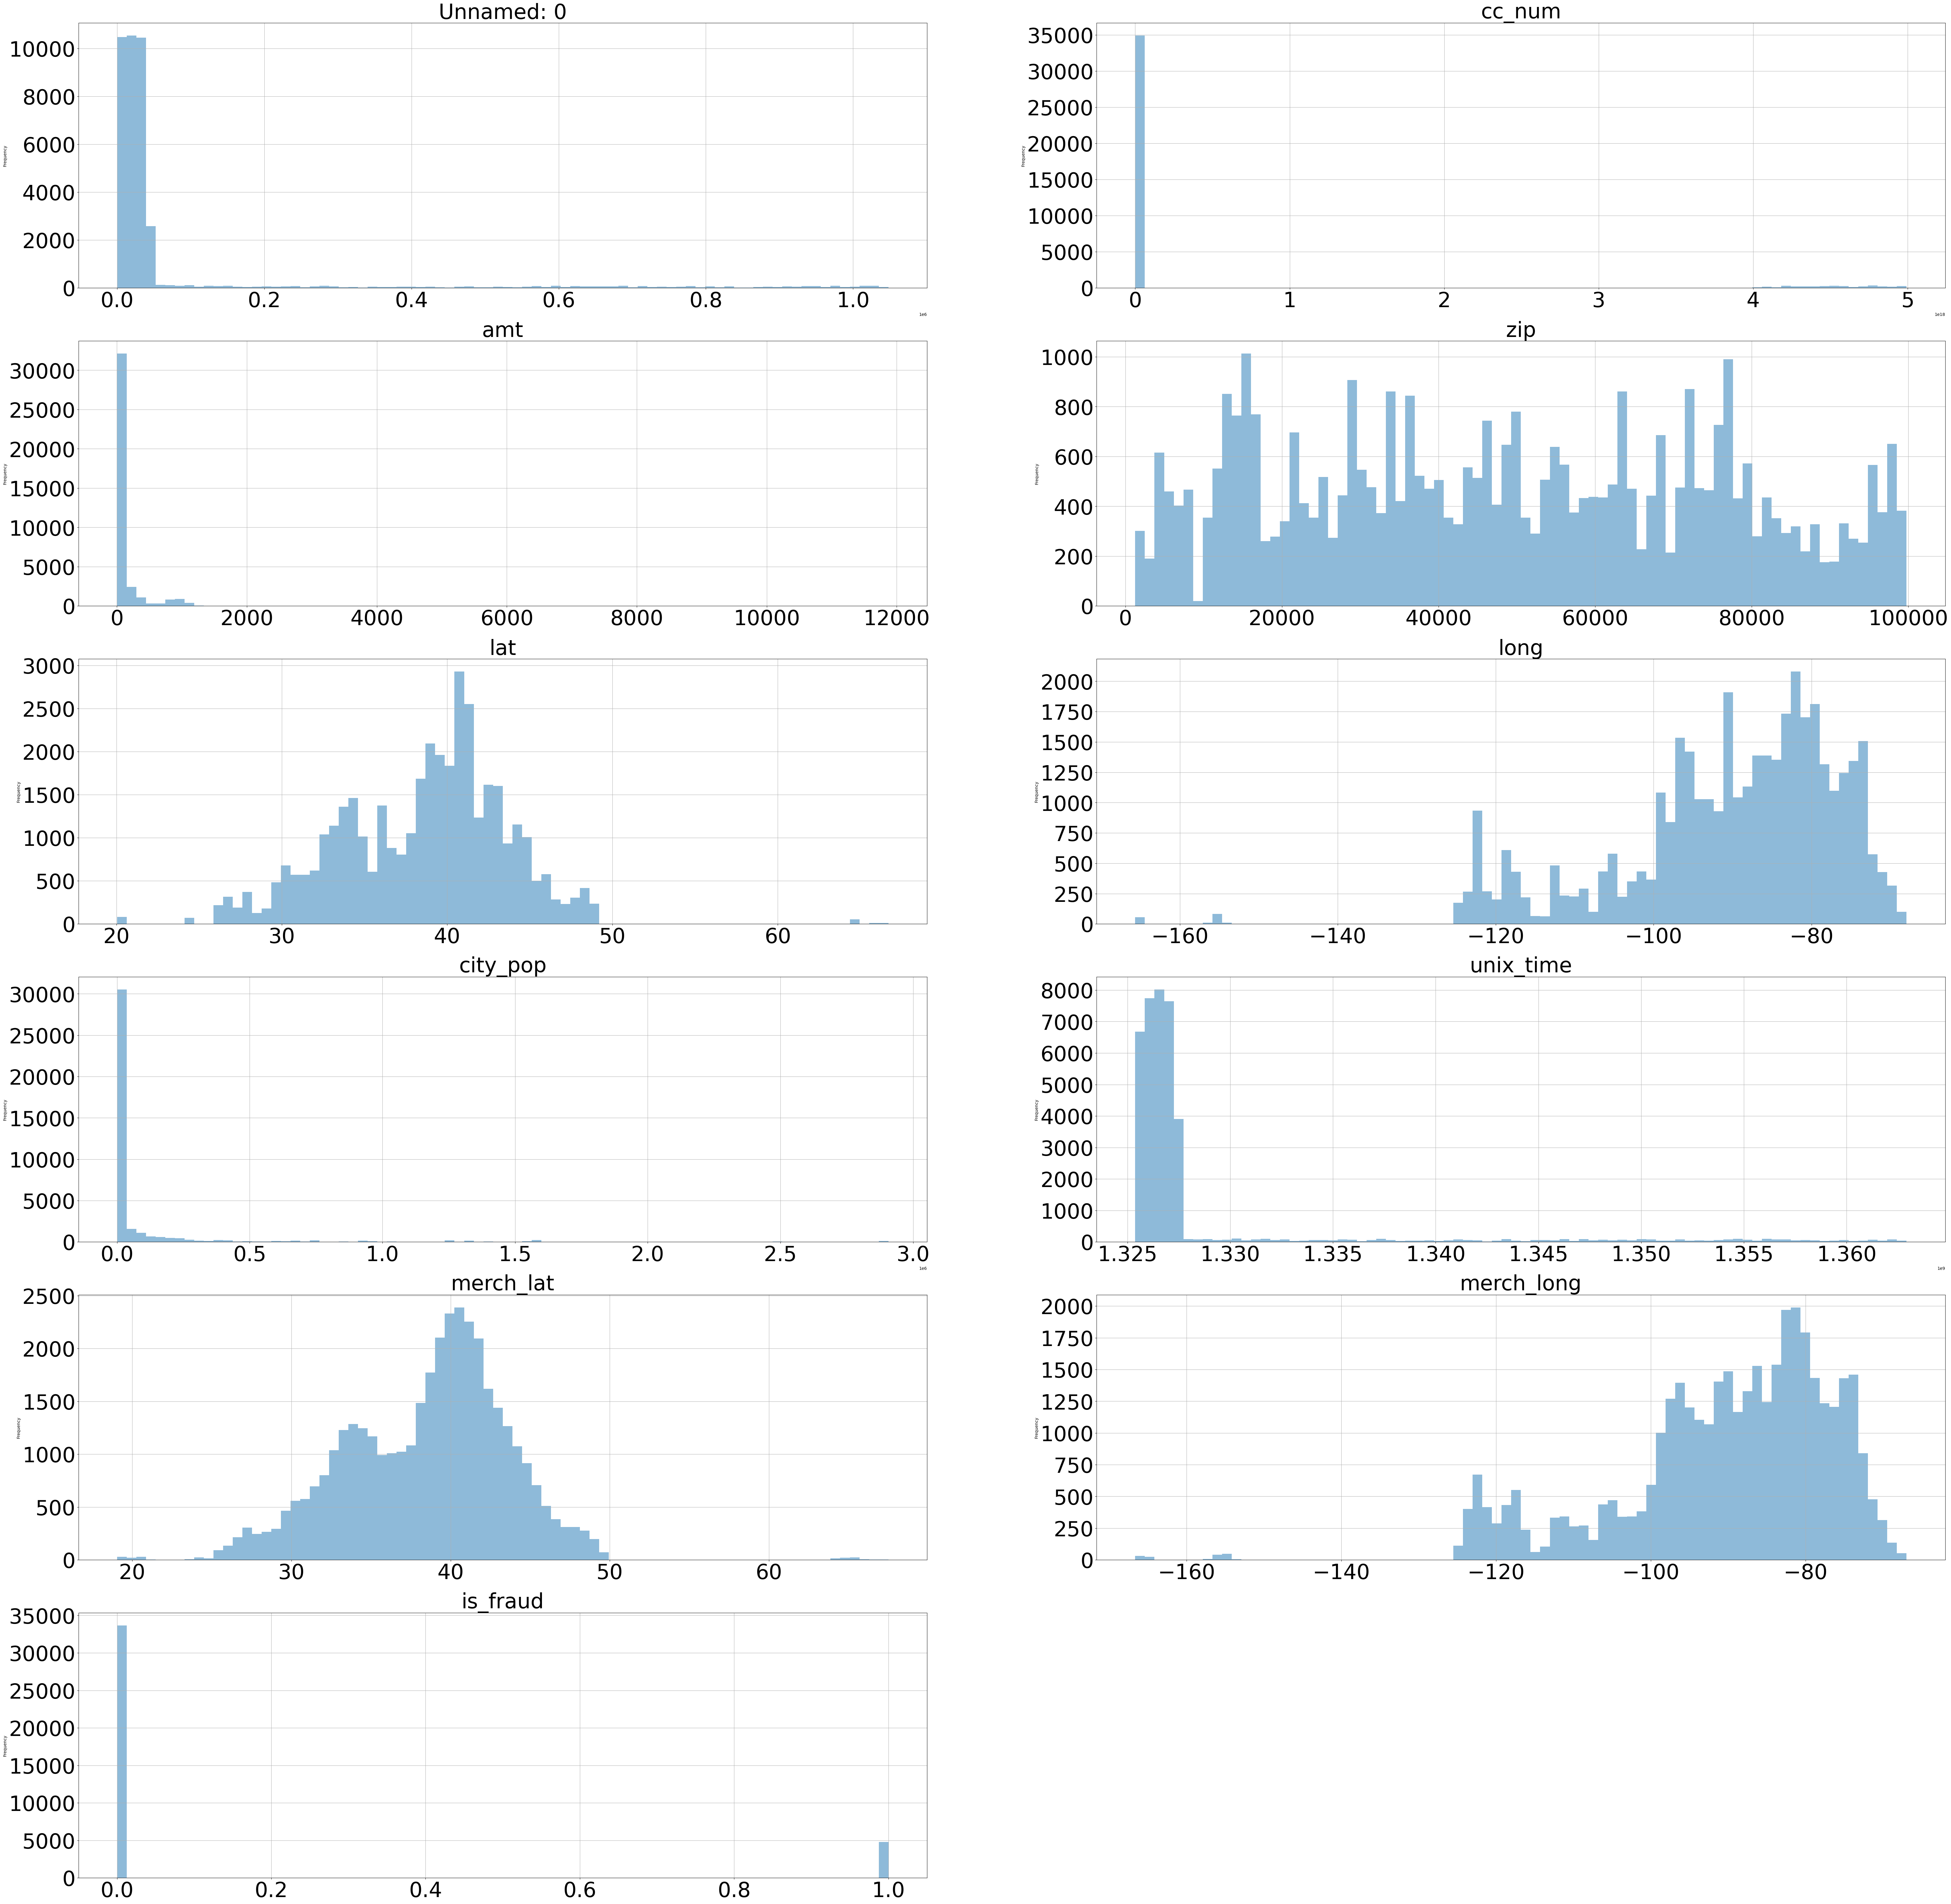

In [ ]:
size = df_train_num.shape[1]
num = int(size/2 + 1)
plt.figure(figsize=(80, 80))
for i in range(0, size, 1):
    plt.subplot(num,2,i+1)
    df_train_num[df_train_num.columns[i]].plot.hist(alpha=0.5,bins=80,grid = True)
    plt.title(df_train_num.columns[i],fontsize=50)
    plt.yticks(fontsize=50)
    plt.xticks(fontsize=50)
plt.show()


Las principales conclusiones que se pueden extraer de los histogramas son las siguientes:

* En primer lugar, existen 13 categorías que han sufrido fraudes. No todas las categorías han sufrido los mismos fraudes, por ejemplo la categoría 4 es la que más ha sufrido. En cambio la 5 y la 13 son las que menos. Se podría analizar con más detalle cada uno de los categorías e intentar ver cuales pueden ser los motivos pero en principio no se observa un patrón entre las categorías y los fraudes.

* Por otro lado, los histogramas relacionados con la longitud y latitud no aportan mucha información ya que las cuatro siguen una distribución aparentemente normal. Además, como se ha comentado, estas variable reflejan ubicación.

* Respecto a la cantidad de dinero defraudada, la gráfica correspondiente (la gráfica de la columna amt), muestra claramente que posee outliers ya que casi todos los valores se agrupan por debajo de 1000. Más adelante se realizará un análisis para poder descartar posibles outliers.

* Finalmente, es curioso observar como las transacciones siguen una distribución claramente desproporcionada con respecto al tiempo.  Casi todas las transacciones se realizan entorno por debajo del valor 1.330e9 de unix_time por lo que podría considerarse como outlier las transacciones que se realizan fuera de este periodo de tiempo. Como se va a realizar el estudio de outliers para la columna amt, se estudiará también la columna unix_time.

Por ello, se procede a continuación a realizar un estudio sobre outliers.

## Estudio de outliers

In [ ]:
df_train.shape[1]
df_train.columns[22]

'is_fraud'

Verificamos que la columna 22 es is_fraud.

Vamos a realizar el scatter plot contra nuestra feature target que es is_fraud.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 8000x10000 with 0 Axes>

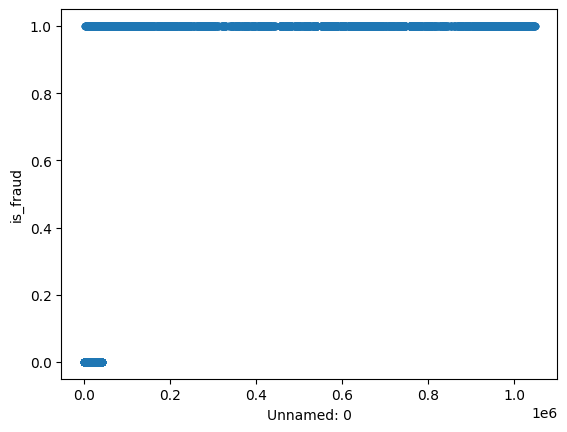

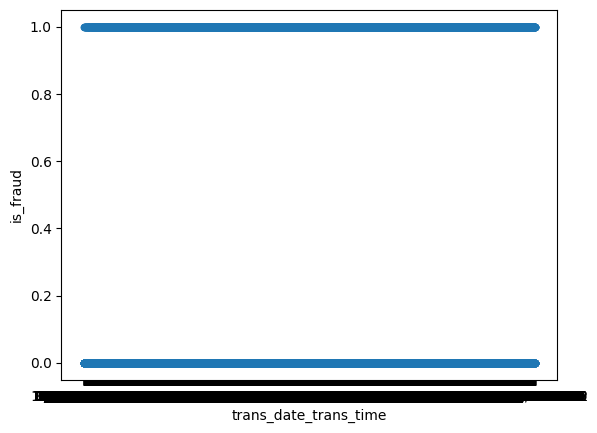

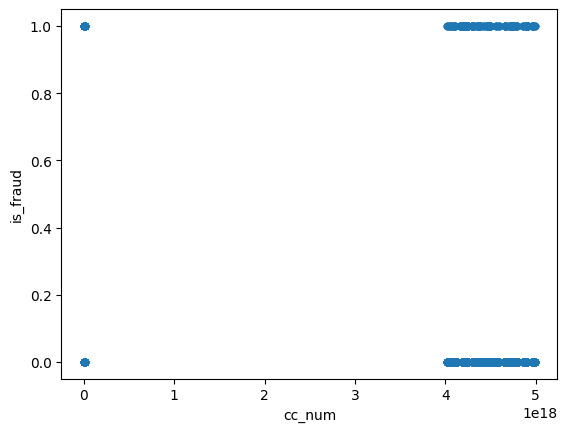

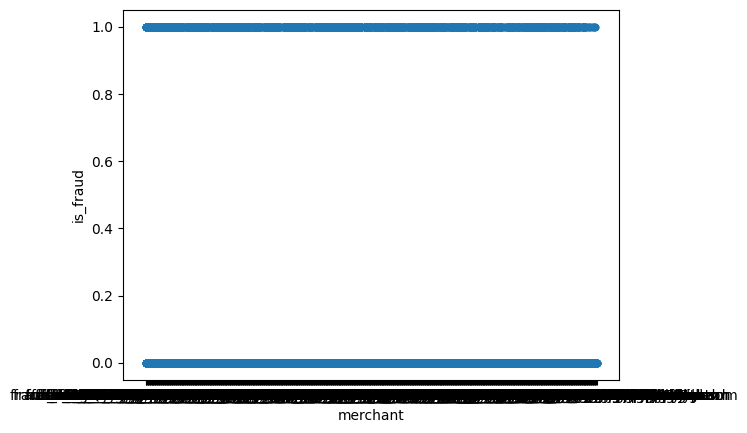

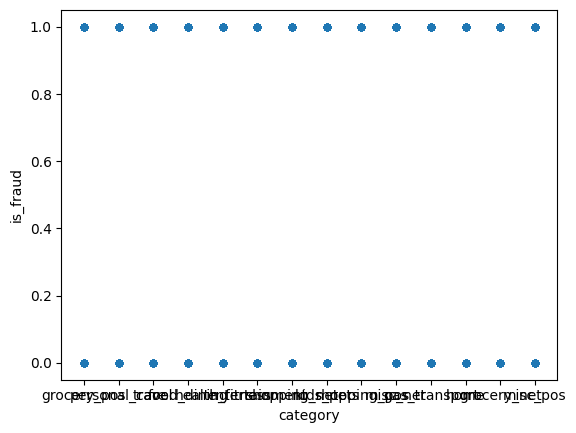

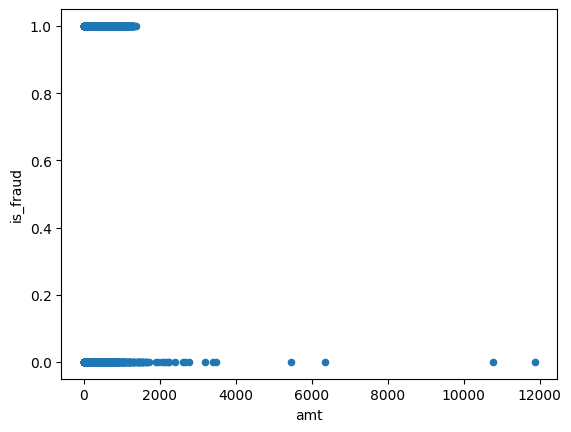

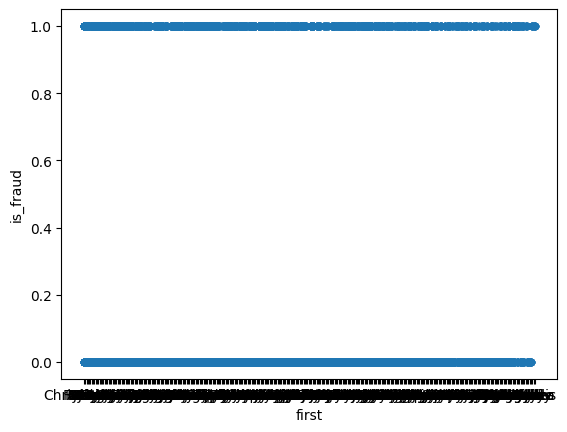

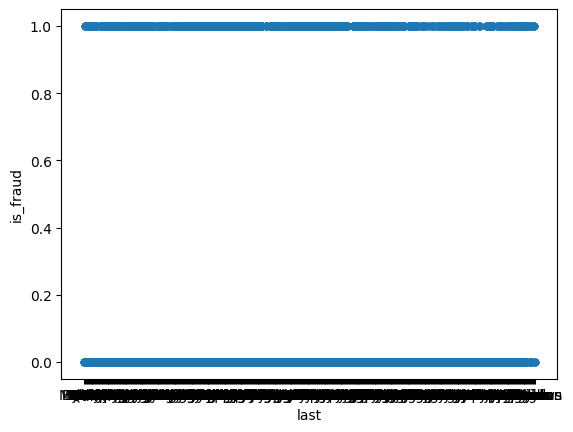

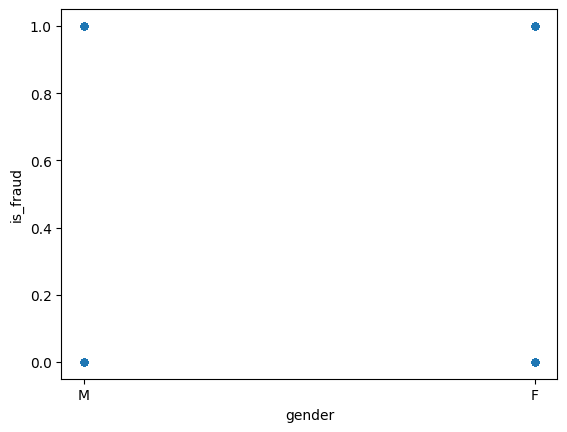

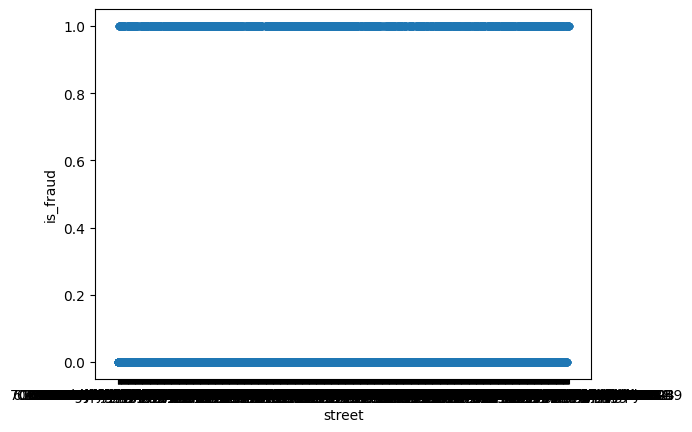

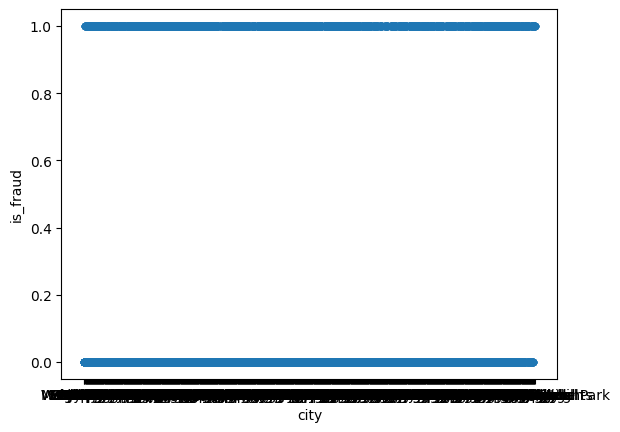

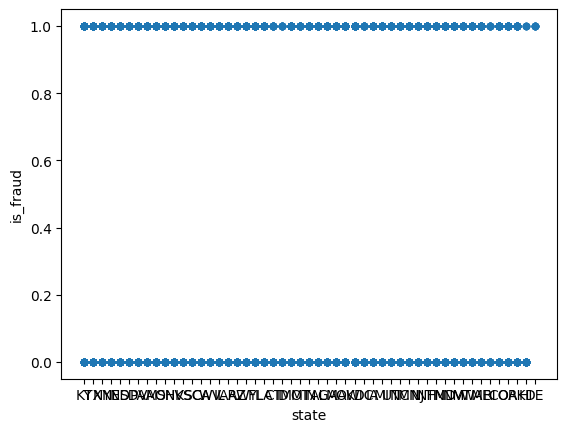

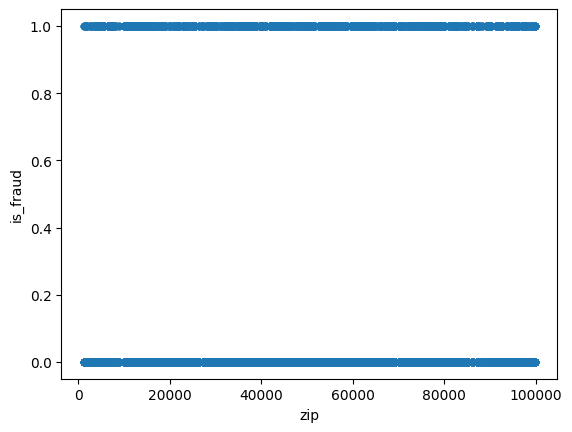

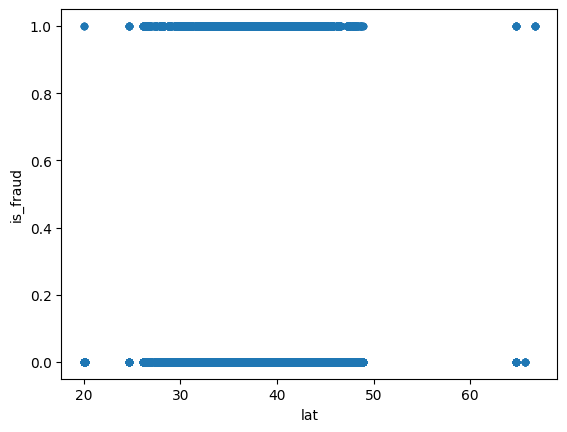

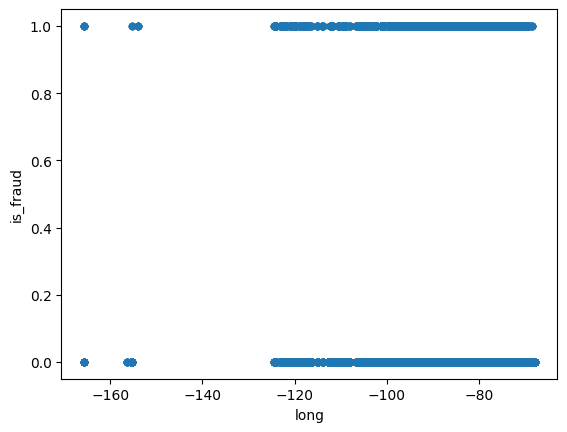

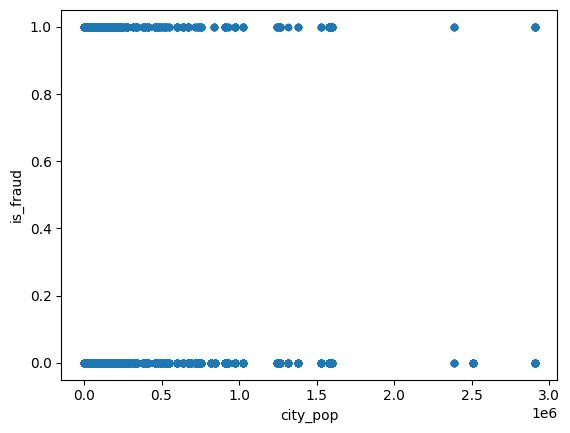

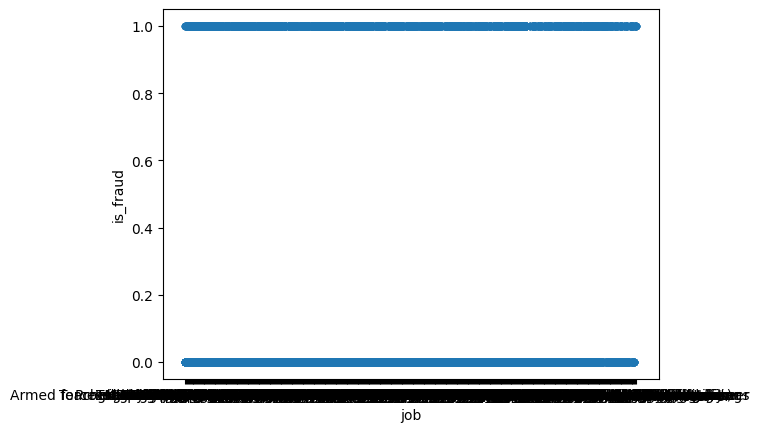

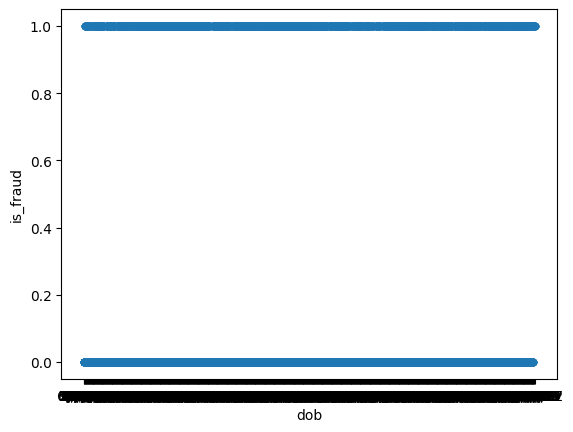

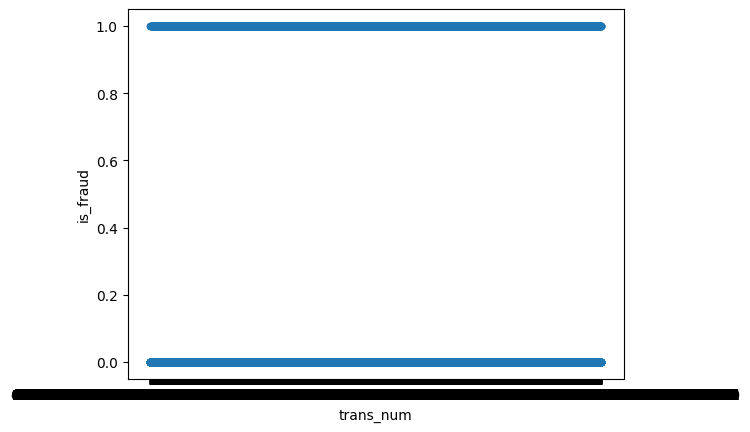

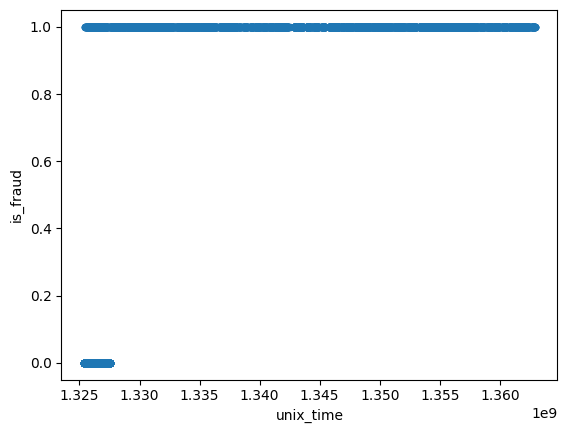

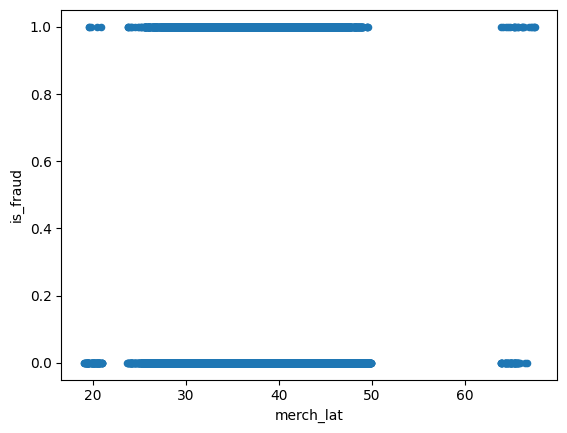

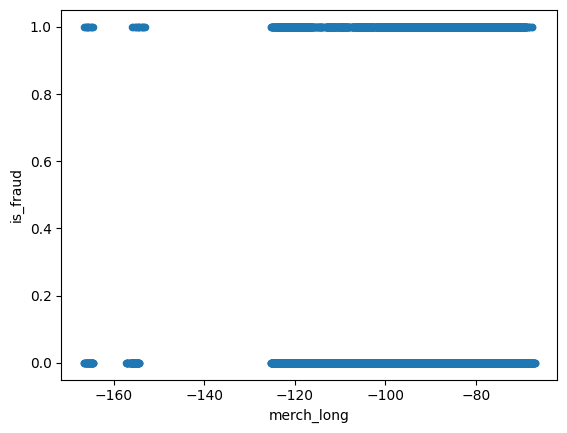

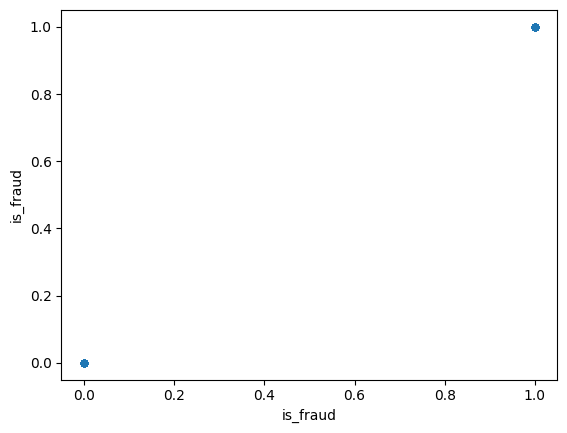

In [ ]:
plt.figure(figsize=(80, 100))

for i in range(0, df_train.shape[1], 1):
    df_train.plot(kind = 'scatter',x=df_train.columns[i],y = df_train.columns[22])
plt.show()

Como efecto NO deseado vemos que muestra todos los valores numéricos en el formato que especificamos para float_format

No es grave, pero hay que tenerlo en uenta para no confundirse luego

Es interesante pintar la relación entre las variables y la variable objetivo, is_fraud, para poder extraer conclusiones de los datos.

* Gráfica cc_num - is_fraud: No se puede extraer ninguna conlsuión importante porque la variable cc_num indica el número de la tarjeta con la que se ha realizado la transacción y como se puede apreciar tarjetas con números parecidos pueden haber sufrido fraude o no. Por lo tanto, no se puede extraer ninguna relación entre el número de tarjeta y si es fraude o no.

* Gráfica merchant/category - is_fraud: Lo que reflejan ambas gráficas es que la distribución es parecida tanto para si ha sido fraude como si no ha sido. Por ello, no se puede afirmar una relación entre fraude y comercio.

* Gráfica amt - is_fraud: Esta gráfica indica dos aspectos que son importantes. En primer lugar, que los fraudes se producen con transacciones de poco valor. Es decir, que la cantidad defrauda es poca (menos de 500 euros aproximadamente). Por otro lado, esta variable posee outliers ya que la mayoría de las transacciones se agrupan por menos de 10000 euros pero sin embargo existen transacciones que se han producido de más de este valor. Estas transacciones pueden considerarse outliers y lo que queda por determinar es la frontera a partir de la cual un valor se considera outlier. Más adelante se determinará esta frontera.

* Gráficas de latitud/altitud - is_fraud: Las cautro gráficas son muy parecidas y tanto si se ha producido fraude como si no se ha producido, las gráficas son iguales. Por lo tanto, no se puede extraer una relación entre la ubicación y el fraude.

* Gráfica unix_time - is_fraud: Todas las transacciones recogidas en el dataset oscilan entre las fechas 1.325376e+09 (que corresponde a la fecha Sunday, January 1, 2012 12:00:00 AM) y la fecha 1.362917e+09 (Sunday, March 10, 2013 12:03:20 PM). Durante este periodo se han producido transacciones tanto fraudolentas como no fraudolentas pero es cierto que es curioso que las transacciones fraudolentas se han producido durante todo este periodo de tiempo pero las no fraudolentas solo al comienzo del periodo. Si se observa la gráfica de distribución de unix_time y la de comparación entre la de unix_time y la de is_fraud es posible apreciar como ese incremento que aparece que al principio de la gráfica de distribución se debe principalmente a las transacciones no fraudolentas y que a partir del tiempo 1.330e9 todas son fraudolentas. Como consecuencia, no se pueden considerar como outliers estas transacciones ya que estaría eliminando las transacciones que han sufrido fraude. Es por eso que no se van a eliminar.

Seguidamente, pasamos a analizar con detalle la variable amt que se ha observado que posee posibles outliers. Para ello creamos un diccionario en donde calculo el número de elementos que se borraría si aplicará los números indicados en el análisis y cálculo el tanto por cierto para conocer la variación. De primeras vamos a probar con 10000 para ver que variación supondría.

In [ ]:
columnas_estudio = ['amt']
valores_estudio = [10000]

resultados=[]
for i in range(0,len(columnas_estudio)):
    df_train_no_outliers = df_train[df_train[columnas_estudio[i]] <= valores_estudio[i]]
    resultados.append({"Columna":columnas_estudio[i],"Original:": df_train.shape[0], "Modificado:": df_train_no_outliers.shape[0],"Diferencia:": df_train.shape[0] - df_train_no_outliers.shape[0],"Variación:":((df_train.shape[0] - df_train_no_outliers.shape[0])/df_train.shape[0])*100})

resultados

[{'Columna': 'amt',
  'Original:': 38438,
  'Modificado:': 38436,
  'Diferencia:': 2,
  'Variación:': 0.005203184348821478}]

Fijando la frontera en 10000, se estarían considerando como outliers únicamente 2 transacciones, las cuales no supondrían ningún problema eliminarlas. Sin embargo, con el fin de ser más precisos, intentamos ajustar más la frontera. Para ello vamos a pintar la distribución de datos de esta variable.

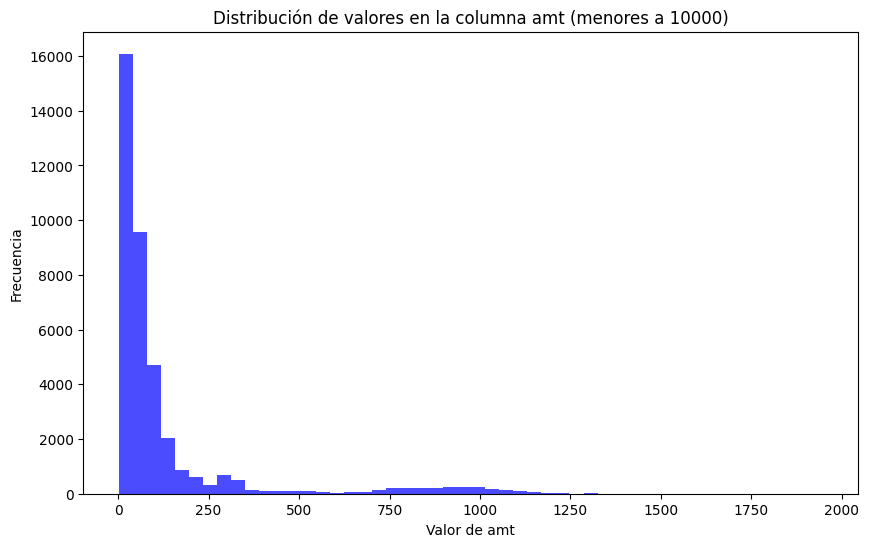

In [ ]:
# Filtramos los valores de la columna 'amt' que sean menores a 10000
filtered_amt = df_train[df_train['amt'] < 2000]['amt']

# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Creamos el histograma
plt.hist(filtered_amt, bins=50, color='blue', alpha=0.7)

# Añadimos etiquetas y título
plt.title('Distribución de valores en la columna amt (menores a 10000)')
plt.xlabel('Valor de amt')
plt.ylabel('Frecuencia')

# Mostramos el histograma
plt.show()


Ajustando el gráfico en 2000, se puede apreciar con más detalle la distribución de los datos. Vamos a calcular cuanto supondría fijar la frontera de outliers en 900.

In [ ]:
columnas_estudio = ['amt']
valores_estudio = [900]

resultados=[]
for i in range(0,len(columnas_estudio)):
    df_train_no_outliers = df_train[df_train[columnas_estudio[i]] <= valores_estudio[i]]
    resultados.append({"Columna":columnas_estudio[i],"Original:": df_train.shape[0], "Modificado:": df_train_no_outliers.shape[0],"Diferencia:": df_train.shape[0] - df_train_no_outliers.shape[0],"Variación:":((df_train.shape[0] - df_train_no_outliers.shape[0])/df_train.shape[0])*100})

resultados

[{'Columna': 'amt',
  'Original:': 38438,
  'Modificado:': 37119,
  'Diferencia:': 1319,
  'Variación:': 3.4315000780477654}]

Fijando la frontera, se eliminarían 1319 registros, lo cual supondría eliminar un 3.43% de los datos del dataset, lo cual creemos que es aceptable. Aún así vamos a comprobar si fijando la frontera en 900, seguiríamos teniendo trasacciones fraudolentas.

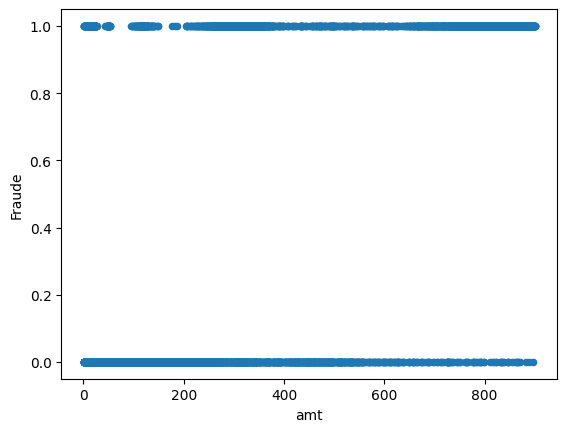

In [ ]:
for i in range(0,len(columnas_estudio)):
    df_train_no_outliers = df_train[df_train[columnas_estudio[i]] <= valores_estudio[i]]
    df_train_no_outliers.plot(kind = 'scatter',x=columnas_estudio[i],y = 'is_fraud')
    plt.xlabel(columnas_estudio[i])
    plt.ylabel('Fraude')
    plt.show()

Como seguimos teniendo trasacciones que han sufrido fraude, damos por bueno el valor de 900 como frontera para considerar como outlier. El hecho de eliminar registros va a permitir al modelo generalizar mucho mejor por lo que aplicamos el cambio.

In [ ]:
columnas_estudio = ['amt']
valores_estudio = [900]

for i in range(0,len(columnas_estudio)):
    df_train = df_train[df_train[columnas_estudio[i]] <= valores_estudio[i]]

print(df_train.shape)
df_train.describe().T

(37119, 23)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,37119.0,6.544339e+04,1.697850e+05,0.000000e+00,1.163650e+04,2.327600e+04,3.493550e+04,1.047918e+06
cc_num,37119.0,4.168658e+17,1.308157e+18,6.041621e+10,1.800360e+14,3.519610e+15,4.642260e+15,4.992350e+18
amt,37119.0,9.222962e+01,1.512293e+02,1.000000e+00,1.072000e+01,5.035000e+01,9.254000e+01,8.999300e+02
zip,37119.0,4.885243e+04,2.705271e+04,1.257000e+03,2.604100e+04,4.808800e+04,7.204200e+04,9.978300e+04
lat,37119.0,3.853465e+01,5.080449e+00,2.002710e+01,3.470310e+01,3.934260e+01,4.189480e+01,6.669330e+01
long,37119.0,-9.027524e+01,1.395007e+01,-1.656723e+02,-9.680940e+01,-8.745690e+01,-8.013810e+01,-6.795030e+01
city_pop,37119.0,8.796736e+04,2.941678e+05,2.300000e+01,7.430000e+02,2.471000e+03,2.113400e+04,2.906700e+06
unix_time,37119.0,1.328084e+09,6.092673e+06,1.325376e+09,1.325966e+09,1.326561e+09,1.327158e+09,1.362917e+09
merch_lat,37119.0,3.853561e+01,5.113185e+00,1.904014e+01,3.480696e+01,3.935266e+01,4.193237e+01,6.739702e+01
merch_long,37119.0,-9.027977e+01,1.396415e+01,-1.666299e+02,-9.693897e+01,-8.739934e+01,-8.019687e+01,-6.696774e+01


Como resultado de hacer esta eliminación de datos, he reducido el tamaño del dataset de 38438 a 37119, es decir, el dataset ha disminuido su tamaño en un 3.43%.

## Correlaciones

Por último, para finalizar este análisis de las variables vamos a realizar la matriz de correlación y vamos a pintarla por medio de un gráfico para poder determinar si es posible eliminar alguna otra variable.

In [ ]:
df_train_num.corr()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,-0.008327,0.504096,-0.004117,-0.011337,0.009430,0.006727,0.998488,-0.012041,0.009843,0.797688
cc_num,-0.008327,1.000000,-0.005390,0.050280,-0.061805,-0.058727,-0.003326,-0.008290,-0.061718,-0.059095,-0.011156
amt,0.504096,-0.005390,1.000000,-0.012659,0.008898,0.010462,0.018954,0.515812,0.008861,0.010774,0.621798
zip,-0.004117,0.050280,-0.012659,1.000000,-0.110385,-0.908811,0.086008,-0.004937,-0.109668,-0.908051,-0.010047
lat,-0.011337,-0.061805,0.008898,-0.110385,1.000000,-0.021060,-0.160603,-0.010337,0.993621,-0.021011,0.006471
long,0.009430,-0.058727,0.010462,-0.908811,-0.021060,1.000000,-0.058822,0.010065,-0.020984,0.999141,0.009422
city_pop,0.006727,-0.003326,0.018954,0.086008,-0.160603,-0.058822,1.000000,0.006541,-0.159826,-0.059008,0.010405
unix_time,0.998488,-0.008290,0.515812,-0.004937,-0.010337,0.010065,0.006541,1.000000,-0.011045,0.010457,0.817740
merch_lat,-0.012041,-0.061718,0.008861,-0.109668,0.993621,-0.020984,-0.159826,-0.011045,1.000000,-0.020919,0.005851
merch_long,0.009843,-0.059095,0.010774,-0.908051,-0.021011,0.999141,-0.059008,0.010457,-0.020919,1.000000,0.009683


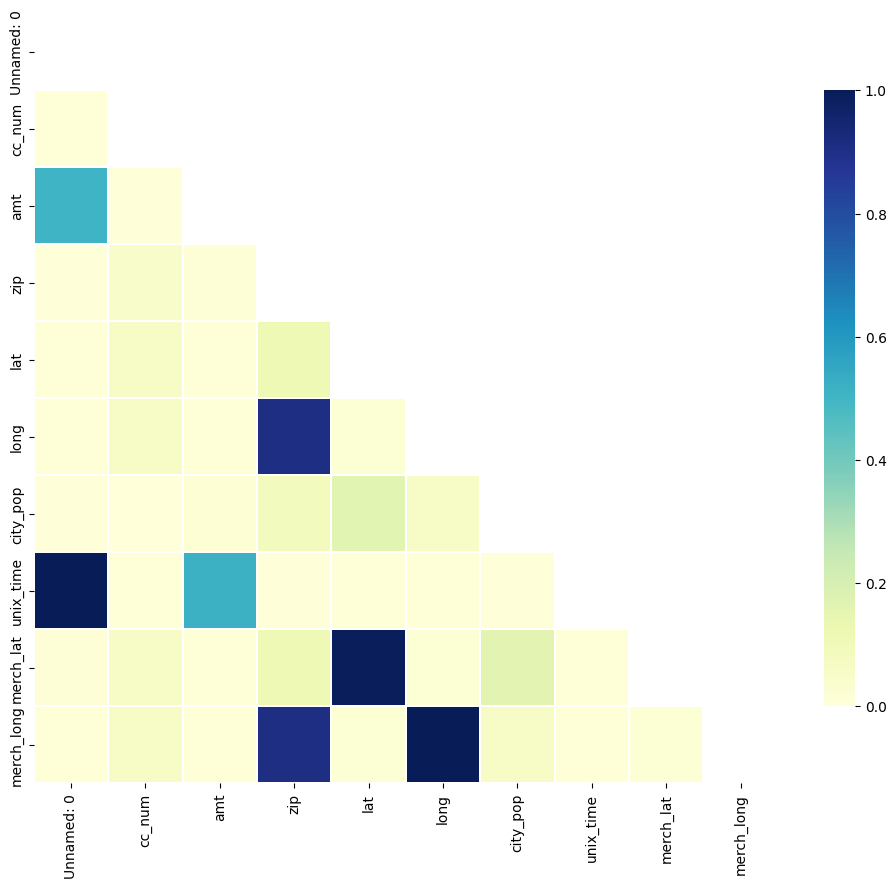

In [ ]:
# Compute the correlation matrix
corr = np.abs(df_train_num.drop(['is_fraud'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Se puede apreciar que las variables long y merch_long están muy relacionadas y lat con merch_lat también. Para fijar un valor, voy a considerar que dos variables están muy relacionadas si el valor absoluto de su valor de relación es mayor a 0.9

In [ ]:
matriz_correlacion=df_train_num.corr()

pares_variables = []
for columna in matriz_correlacion.columns:
    correlaciones = matriz_correlacion[columna]
    pares_variables.extend([(columna, matriz_correlacion.index[i]) for i, valor in enumerate(correlaciones) if abs(valor) > 0.5 and matriz_correlacion.index[i] != columna])

# Imprimir los pares de variables
for par in pares_variables:
    print(f'Variables: {par[0]} - {par[1]} - Correlación: {matriz_correlacion.loc[par[0], par[1]]}')

Variables: Unnamed: 0 - amt - Correlación: 0.5040959932883423
Variables: Unnamed: 0 - unix_time - Correlación: 0.9984878012379588
Variables: Unnamed: 0 - is_fraud - Correlación: 0.7976878712250581
Variables: amt - Unnamed: 0 - Correlación: 0.5040959932883423
Variables: amt - unix_time - Correlación: 0.5158124032722374
Variables: amt - is_fraud - Correlación: 0.6217979903943073
Variables: zip - long - Correlación: -0.9088112366735095
Variables: zip - merch_long - Correlación: -0.9080508451065598
Variables: lat - merch_lat - Correlación: 0.9936211151022203
Variables: long - zip - Correlación: -0.9088112366735095
Variables: long - merch_long - Correlación: 0.9991414538713612
Variables: unix_time - Unnamed: 0 - Correlación: 0.9984878012379588
Variables: unix_time - amt - Correlación: 0.5158124032722374
Variables: unix_time - is_fraud - Correlación: 0.8177399463721434
Variables: merch_lat - lat - Correlación: 0.9936211151022203
Variables: merch_long - zip - Correlación: -0.9080508451065598


El diccionario que hemos impreso refleja que las variables de longitud y longitud del comercio y la latitud y la latitud del comercio están muy relacionadas entre sí. También las variables unix_time, amt y zip tienen un grado de relación inferior y aún así consideramos que es interesante para nuestro análisis.